In [1]:
import torch
import numpy as np
import pylab as plt

In [2]:
conv2d = torch.nn.Conv2d(2, 3, (5,5), padding=2, bias=False)
kernel = np.arange(25*6).reshape(3,2,5,5)
x = np.arange(625*2).reshape(1,2,25,25)
y = np.arange(625*3,0,-1).reshape(1,3,25,25)

In [3]:
conv2d.load_state_dict({'weight': torch.tensor(kernel).float()})
conv2d.state_dict()

OrderedDict([('weight', tensor([[[[  0.,   1.,   2.,   3.,   4.],
                        [  5.,   6.,   7.,   8.,   9.],
                        [ 10.,  11.,  12.,  13.,  14.],
                        [ 15.,  16.,  17.,  18.,  19.],
                        [ 20.,  21.,  22.,  23.,  24.]],
              
                       [[ 25.,  26.,  27.,  28.,  29.],
                        [ 30.,  31.,  32.,  33.,  34.],
                        [ 35.,  36.,  37.,  38.,  39.],
                        [ 40.,  41.,  42.,  43.,  44.],
                        [ 45.,  46.,  47.,  48.,  49.]]],
              
              
                      [[[ 50.,  51.,  52.,  53.,  54.],
                        [ 55.,  56.,  57.,  58.,  59.],
                        [ 60.,  61.,  62.,  63.,  64.],
                        [ 65.,  66.,  67.,  68.,  69.],
                        [ 70.,  71.,  72.,  73.,  74.]],
              
                       [[ 75.,  76.,  77.,  78.,  79.],
                        [ 80.,

In [4]:
tx = torch.autograd.Variable(torch.tensor(x).float(), requires_grad=True)
ty = torch.autograd.Variable(torch.tensor(y).float(), requires_grad=True)
out = conv2d(tx)

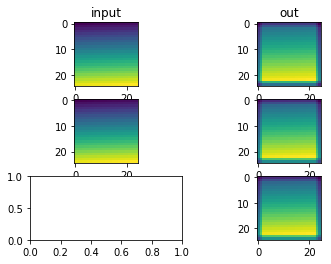

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax[0,0].imshow(x[0,0])
ax[0,0].set_title('input')
ax[1,0].imshow(x[0,1])
ax[0,1].set_title('out')
ax[0,1].imshow(out.detach().numpy()[0,0])
ax[1,1].imshow(out.detach().numpy()[0,1])
ax[2,1].imshow(out.detach().numpy()[0,2])
plt.show()

In [6]:
conv2d.zero_grad()
out.backward(gradient=ty)

In [7]:
tx.grad.detach().numpy().shape

(1, 2, 25, 25)

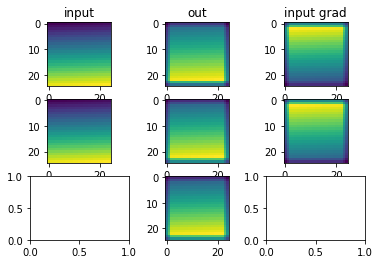

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=3)

ax[0,0].set_title('input')
ax[0,0].imshow(x[0,0])
ax[1,0].imshow(x[0,1])
ax[0,1].set_title('out')
ax[0,1].imshow(out.detach().numpy()[0,0])
ax[1,1].imshow(out.detach().numpy()[0,1])
ax[2,1].imshow(out.detach().numpy()[0,2])
ax[0,2].set_title('input grad')
ax[0,2].imshow(tx.grad.detach().numpy()[0,0])
ax[1,2].imshow(tx.grad.detach().numpy()[0,1])

plt.show()

In [9]:
conv2d.weight.grad.shape

torch.Size([3, 2, 5, 5])

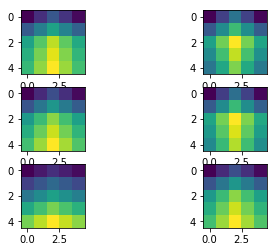

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax[0,0].imshow(conv2d.weight.grad.detach().numpy()[0,0])
ax[1,0].imshow(conv2d.weight.grad.detach().numpy()[1,0])
ax[2,0].imshow(conv2d.weight.grad.detach().numpy()[2,0])
ax[0,1].imshow(conv2d.weight.grad.detach().numpy()[0,1])
ax[1,1].imshow(conv2d.weight.grad.detach().numpy()[1,1])
ax[2,1].imshow(conv2d.weight.grad.detach().numpy()[2,1])
plt.show()

In [23]:
ta = torch.autograd.Variable(
    torch.tensor(np.arange(0,5)).float(),
    requires_grad=True
)

tb = torch.autograd.Variable(
    torch.tensor(np.arange(5,10)).float(),
    requires_grad=True
)

tones = torch.autograd.Variable(
    torch.tensor(np.ones(10)).float(),
    requires_grad=True
)

In [24]:
import torch.functional as F

In [25]:
tab = torch.cat([ta, tb])

In [26]:
tab.backward(gradient=tones)

In [28]:
ta.grad

tensor([1., 1., 1., 1., 1.])

In [29]:
tb.grad

tensor([1., 1., 1., 1., 1.])

In [31]:
tab.grad

In [32]:
tab

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], grad_fn=<CatBackward>)

In [33]:
ta

tensor([0., 1., 2., 3., 4.], requires_grad=True)

In [34]:
tab.grad_fn